# Neural networks that learn

A worked example of the chapter from "The (New) Turing Omnibus", borrowing heavily from http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf

## The neural network structure

The example in the book uses a fixed number of input neurons and output neurons, with one layer of medial (hidden) neurons between them. There could be any number of hidden layers but let's run with this example...

In [19]:
%matplotlib inline
num_input = 3
num_output = 2
num_medial = 150

In [20]:
from numpy.random import rand

input_medial_synapses = rand(num_input, num_medial) * 0.1
medial_output_synapses = rand(num_medial, num_output) * 0.1

medial_output_synapses.shape

(150, 2)

## Utility functions

These will help us train the network and measure the error.

In [21]:
from numpy import array
from math import atan2, sqrt

def random_cartesian_coordinate():
    """
    Randomly generate a point on the 2d plane.
    This is simpler than generating in polar coordinates,
    because the radial coordinate would need to be non uniform
    to distribute over a uniform area.
    """
    return rand(2,)

def test_cartesian_to_polar(cart):
    """
    Analytical solution for converting cartesian -> polar coordinates.
    """
    x, y = cart
    r = sqrt(x ** 2 + y ** 2)
    theta = atan2(y, x)
    return array([r, theta])

test_cartesian_to_polar([-1, 0])

array([ 1.        ,  3.14159265])

## Activation function

This is applied to the value of each neuron after summing up the inputs. It can be any sigmoid function but we're using the hyperbolic tangent.

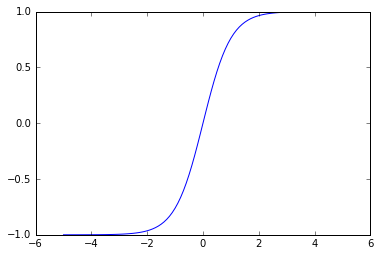

In [24]:
from numpy import exp, arange
import matplotlib.pyplot as plt

def sigmoid(signal):
    """
    The hyperbolic tangent
    """
    return (exp(signal) - exp(-signal)) / (exp(signal) + exp(-signal))

x = arange(-5, 5, 0.1);
y = sigmoid(x)
plt.plot(x,y)

### Derivitive

The derivitive of the sigmoid is used by the back propagation algorithm.

This is $1-\tanh^2 x$

Or equivalently, $\frac {4 e^{2x}} { (   {e ^ {2x} + 1   )  }^2}$

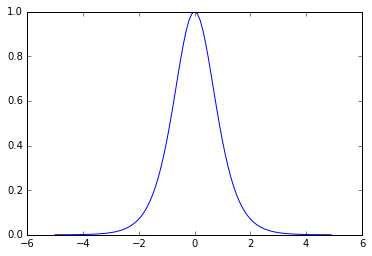

In [25]:
def sigmoid_derivative(signal):
    """
    The derivative of the hyperbolic tangent
    """
    return (4 * exp(2 * signal)) / (exp(2 * signal) + 1) ** 2

x = arange(-5, 5, 0.1);
y = sigmoid_derivative(x)
plt.plot(x,y)

## Forward propagation

In [39]:
from numpy import dot

def forward_propagate(input_signal):
    """
    Run the input through the neural network
    """
    medial_values = sigmoid(dot(input_signal, input_medial_synapses))
    return medial_values, sigmoid(dot(medial_values, medial_output_synapses))
                            
forward_propagate(array([-1, 0, 1]))[1]

array([-0.00547732, -0.00867121])

## Error measurement

For the output layer the combined error is $E = \frac {1} {2} \sum_j ({o_j - t_j})^2$ - this is the thing we want to minimise.

$o_j$ is the actual output for node $j$ and $t_j$ is the expected output for node $j$.

The factor of $\frac {1} {2}$ doesn't matter for defining the error metric, it's just chosen to make the differentiation simpler.

In [37]:
def error(network_input, network_output):
    return test_cartesian_to_polar(network_input) - network_output

error(array([-1, 0]), array([0.9, 3.14]))

array([ 0.1       ,  0.00159265])

## Finding optimal weights

Consider the error function as a function of each synapse $w_{ij}$. The partial derivative of this function with respect to $w_{ij}$ tells you how much the error changes if the weight changes a small amount.

We want to apply *gradient descent* - adjusting the weight a little bit to reduce its contribution to the total error:

$$\Delta w_{ij} = - \gamma \frac {\delta E} {\delta w_{ij}}$$

$\gamma$ (the learning rate) is some small number so we take tiny steps per iteration.

The derivative can be found using the chain rule...

## Backpropagation

For the output layer, we know the error is $t_k - o_j$.

This lets us change the weights connecting layers 2 & 3.

To change the weights connecting layers 1 & 2, we need to back propagate the errors to layer 2.

Something something chain rule multiply all the things. I am confused and made this all up.

$$\Delta w_{ij} = - \gamma \sum_k (t_k - o_k) \sigma'_j w_{jk} $$

Where $i$ is a node in layer 1, $j$ is a node in layer 2, $k$ are nodes in layer 3. $\sigma'_k$ is the derivative of the activation functions, evaluated at node $k$.

????

In [41]:
def back_propagate(known_input, known_output, learning_rate=0.1):
    """
    Run the network forwards, then back propagate the error contributions.
    """
    global input_medial_synapses, medial_output_synapses
    
    medial_values, output = forward_propagate(known_input)